# Disease Prediction Classifier

## Import Dependencies

In [1]:
#Import all dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print ('ready')

ready


### Load Dataset

In [2]:

df=pd.read_csv('healthcare-dataset-stroke-data.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df['bmi'].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [9]:
df['bmi'].unique()


array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

### Data Cleaning

In [10]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [11]:
df['bmi'].unique()

array([36.6       , 28.89323691, 32.5       , 34.4       , 24.        ,
       29.        , 27.4       , 22.8       , 24.2       , 29.7       ,
       36.8       , 27.3       , 28.2       , 30.9       , 37.5       ,
       25.8       , 37.8       , 22.4       , 48.9       , 26.6       ,
       27.2       , 23.5       , 28.3       , 44.2       , 25.4       ,
       22.2       , 30.5       , 26.5       , 33.7       , 23.1       ,
       32.        , 29.9       , 23.9       , 28.5       , 26.4       ,
       20.2       , 33.6       , 38.6       , 39.2       , 27.7       ,
       31.4       , 36.5       , 33.2       , 32.8       , 40.4       ,
       25.3       , 30.2       , 47.5       , 20.3       , 30.        ,
       28.9       , 28.1       , 31.1       , 21.7       , 27.        ,
       24.1       , 45.9       , 44.1       , 22.9       , 29.1       ,
       32.3       , 41.1       , 25.6       , 29.8       , 26.3       ,
       26.2       , 29.4       , 24.4       , 28.        , 28.8 

In [12]:
df['bmi'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df.drop(columns=['id'], inplace=True)

### Feature Engineering

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
label_encoder = LabelEncoder()

In [24]:

# Specify columns
categorical_columns = ['ever_married', 'gender','work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['id', 'age', 'hypertension', 'heart_disease']
target_column = 'stroke'

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # Drop first to avoid redundancy

# Apply OneHotEncoder to categorical columns
encoded_data = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for encoded columns
encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

# Drop original categorical columns and merge encoded data
df_final = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the final DataFrame
print("Original DataFrame:")
print(df)
print("\nFinal DataFrame with Encoded Columns:")
print(df_final)

Original DataFrame:
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucos

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Data Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical columns (excluding target column 'stroke')
numerical_columns = df_final.columns.difference(['stroke'])  # Exclude target column
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

# Display the normalized DataFrame
print(df_final)


           age  hypertension  heart_disease  avg_glucose_level       bmi  \
0     0.816895           0.0            1.0           0.801265  0.301260   
1     0.743652           0.0            0.0           0.679023  0.212981   
2     0.975586           0.0            1.0           0.234512  0.254296   
3     0.597168           0.0            0.0           0.536008  0.276060   
4     0.963379           1.0            0.0           0.549349  0.156930   
...        ...           ...            ...                ...       ...   
5105  0.975586           1.0            0.0           0.132167  0.212981   
5106  0.987793           0.0            0.0           0.323516  0.340206   
5107  0.426270           0.0            0.0           0.128658  0.232532   
5108  0.621582           0.0            0.0           0.513203  0.175258   
5109  0.536133           0.0            0.0           0.139230  0.182131   

      stroke  ever_married_Yes  gender_Male  gender_Other  \
0          1              

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
#scaler = StandardScaler()

# Apply Standardization to the numerical columns (excluding target column 'stroke')
#numerical_columns = df_final.columns.difference(['stroke'])  # Exclude target column
#df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

# Display the standardized DataFrame
#print(df_final)


In [29]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.212981,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df_final.shape

(5110, 17)

### Exploratory Data Analysis

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


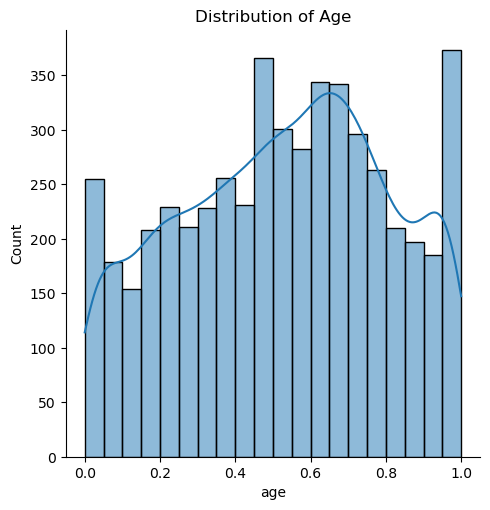

In [32]:
# Distribution plot for 'age' column
sns.displot(df_final['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

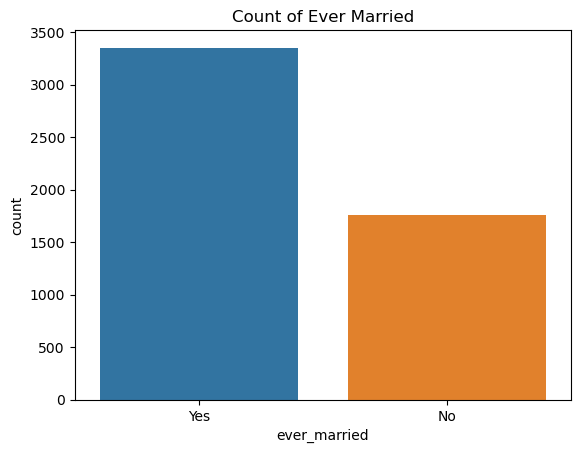

In [34]:
# Count plot for the 'ever_married' column (categorical data)
sns.countplot(x='ever_married', data=df)
plt.title('Count of Ever Married')
plt.show()


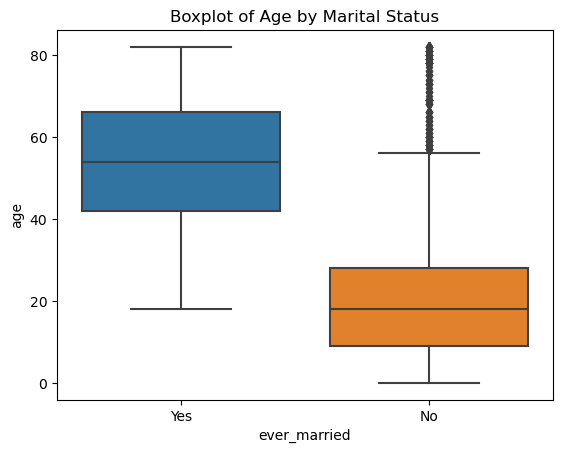

In [35]:
# Box plot to visualize the distribution of 'age' across 'ever_married' categories
sns.boxplot(x='ever_married', y='age', data=df)
plt.title('Boxplot of Age by Marital Status')
plt.show()


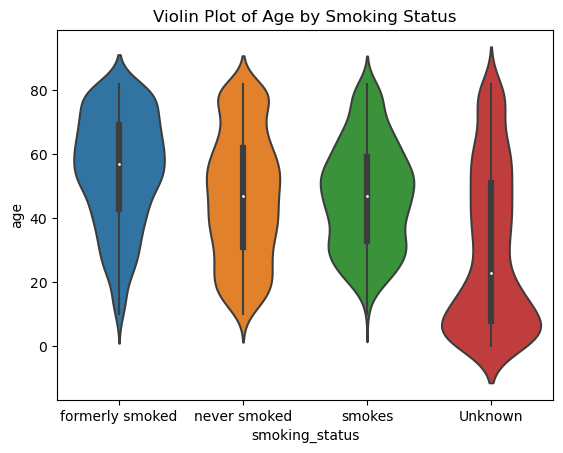

In [36]:
# Violin plot for 'age' by 'smoking_status'
sns.violinplot(x='smoking_status', y='age', data=df)
plt.title('Violin Plot of Age by Smoking Status')
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

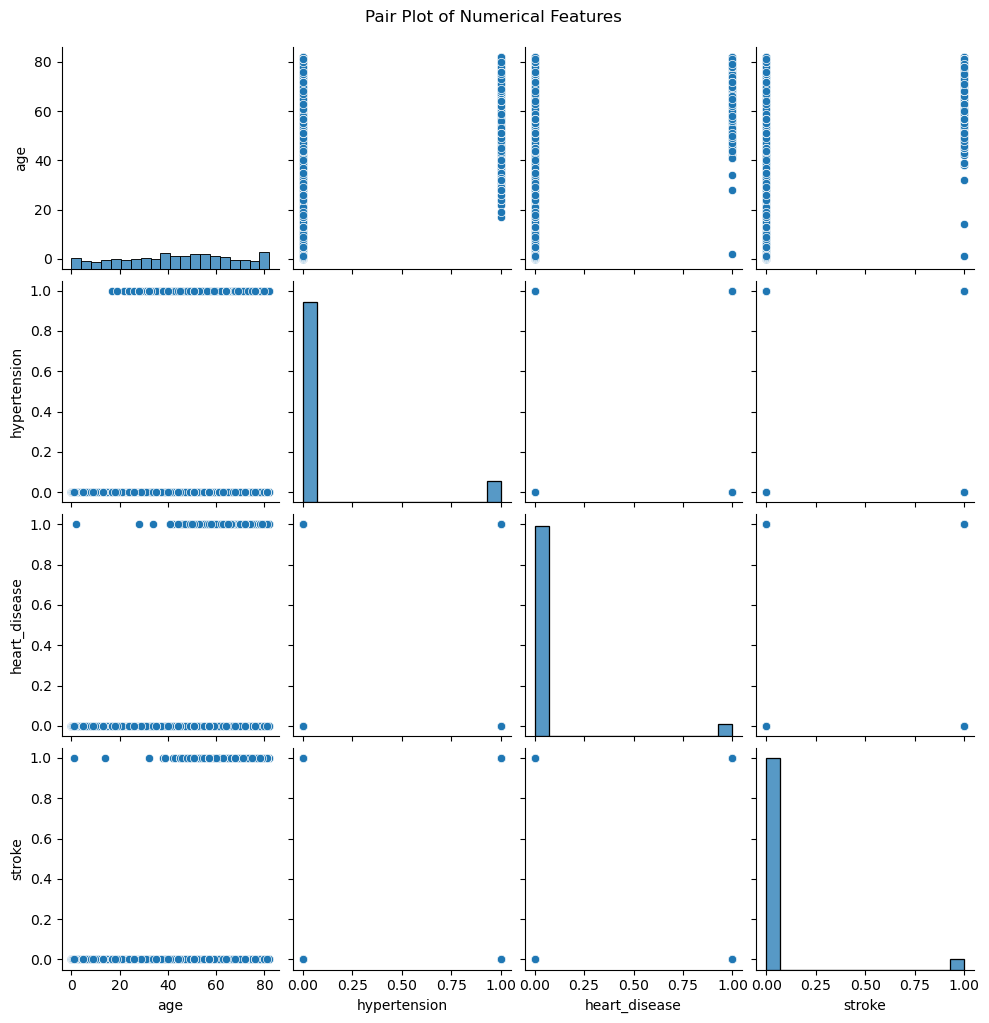

In [37]:
# Pair plot for numerical columns to see relationships between features
sns.pairplot(df[['age', 'hypertension', 'heart_disease', 'stroke']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


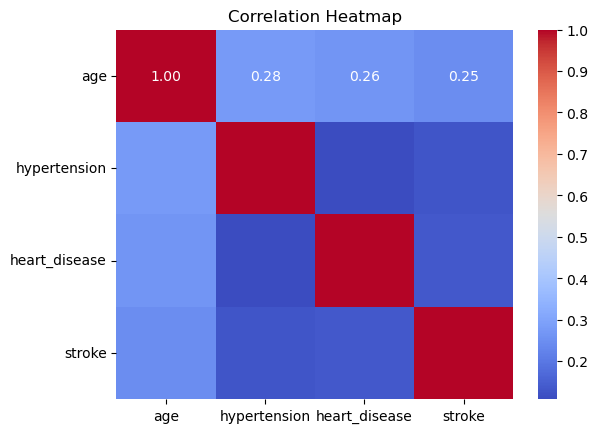

In [38]:
# Heatmap for correlation matrix of numerical columns
correlation_matrix = df[['age', 'hypertension', 'heart_disease', 'stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


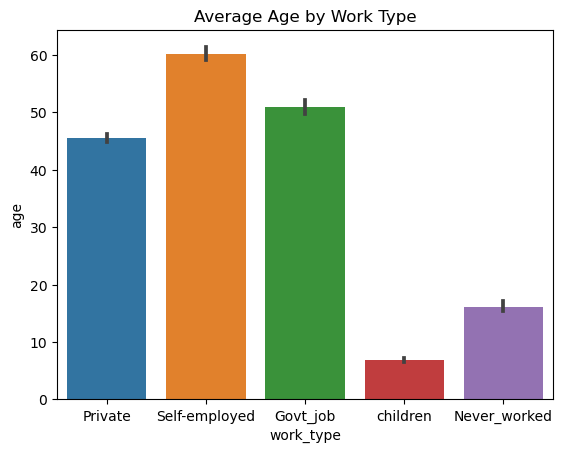

In [39]:
# Bar plot showing the average 'age' by 'work_type'
sns.barplot(x='work_type', y='age', data=df)
plt.title('Average Age by Work Type')
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

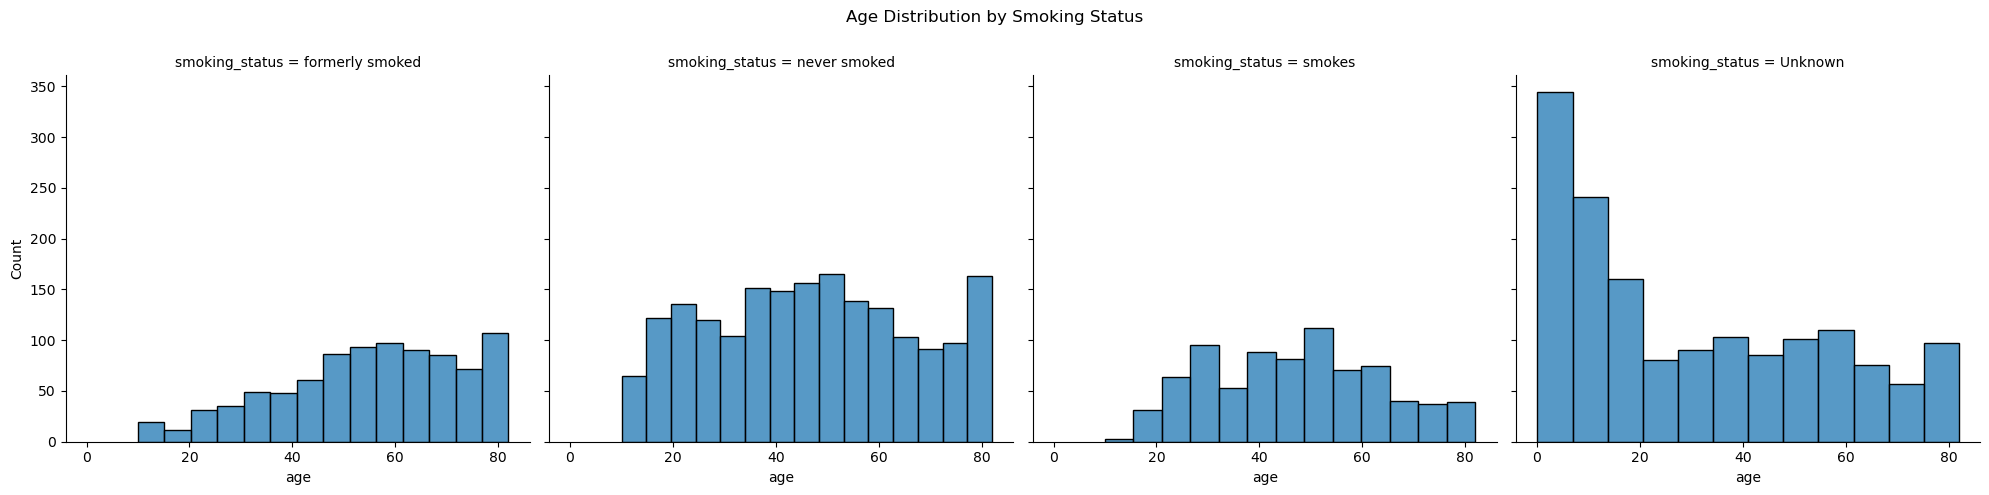

In [40]:
# FacetGrid to plot 'age' distribution across different 'smoking_status'
g = sns.FacetGrid(df, col='smoking_status', height=5)
g.map(sns.histplot, 'age')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Age Distribution by Smoking Status')
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


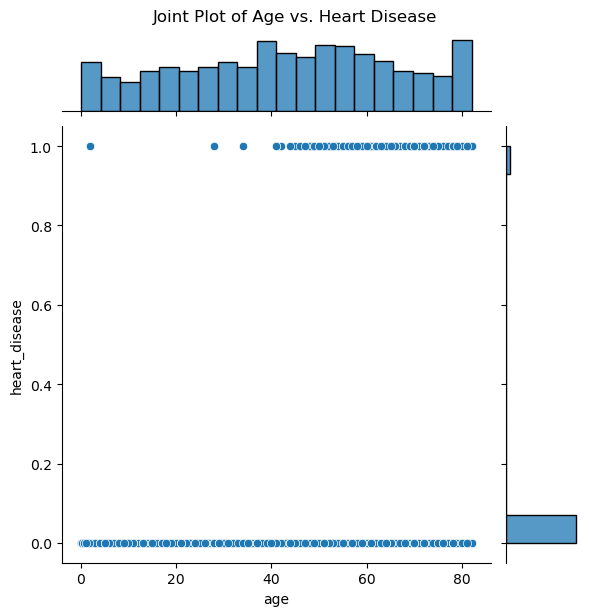

In [41]:
# Joint plot to show the relationship between 'age' and 'heart_disease'
sns.jointplot(x='age', y='heart_disease', data=df, kind='scatter')
plt.suptitle('Joint Plot of Age vs. Heart Disease', y=1.02)
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\

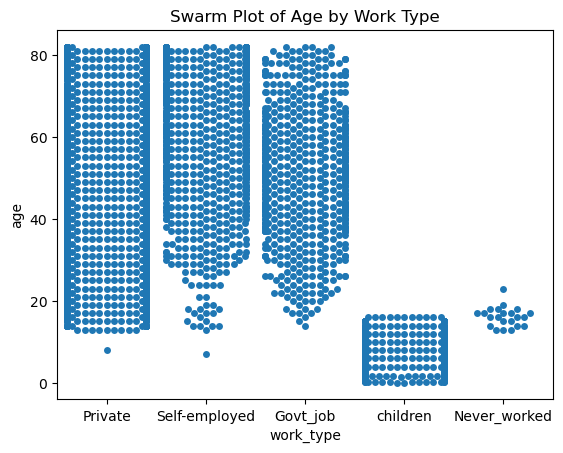

In [42]:
# Swarm plot to show 'age' distribution for each 'work_type'
sns.swarmplot(x='work_type', y='age', data=df)
plt.title('Swarm Plot of Age by Work Type')
plt.show()


### Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_final is your DataFrame and 'stroke' is the target column
X = df_final.drop(columns=['stroke'])  # Features (independent variables)
y = df_final['stroke']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)
